In [7]:
import numpy as np 
import matplotlib.pyplot as plt 

from math import sin, cos, radians, degrees

np.set_printoptions(suppress=True, precision=5)


In [8]:
def to_unit_vector(v):
    h = np.zeros(shape=(v.shape[0], 2))
    h[:, 0] = np.cos(np.radians(v))
    h[:, 1] = np.sin(np.radians(v))
    return h

In [9]:
trajectory_1 = np.array([[2, 1], [2, 3], [3, 4], [4, 5], [4, 7]])
thetas_1 = np.asarray([90, 45, 45, 90, 90])
headings_1 = to_unit_vector(thetas_1)

trajectory_2 = np.array([[5, 2], [6, 3], [7, 4], [8, 4], [9, 3]])
thetas_2 = np.asarray([45, 45, 0, -45, -45])
headings_2 = to_unit_vector(thetas_2)

In [13]:
def transform(trajectory, theta, t = np.zeros(2,)):
    R = np.asarray([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])
    trajectory = trajectory - t
    # print(trajectory.shape, trajectory, t.shape, t)
    return trajectory @ R

In [14]:
# Transform agent 1
theta_1 = radians(thetas_1[0] - 90)
trajectory_11 = transform(trajectory_1, theta_1, trajectory_1[0])
heading_11 = transform(headings_1, theta_1)

theta_2 = radians(thetas_2[0] - 90)
trajectory_12 = transform(trajectory_1, theta_2, trajectory_2[0])
heading_12 = transform(headings_1, theta_2)

In [15]:
# Transform agent 2
theta_1 = radians(thetas_1[0] - 90)
trajectory_21 = transform(trajectory_2, theta_1, trajectory_1[0])
heading_21 = transform(headings_2, theta_1)

theta_2 = radians(thetas_2[0] - 90)
trajectory_22 = transform(trajectory_2, theta_2, trajectory_2[0])
heading_22 = transform(headings_2, theta_2)

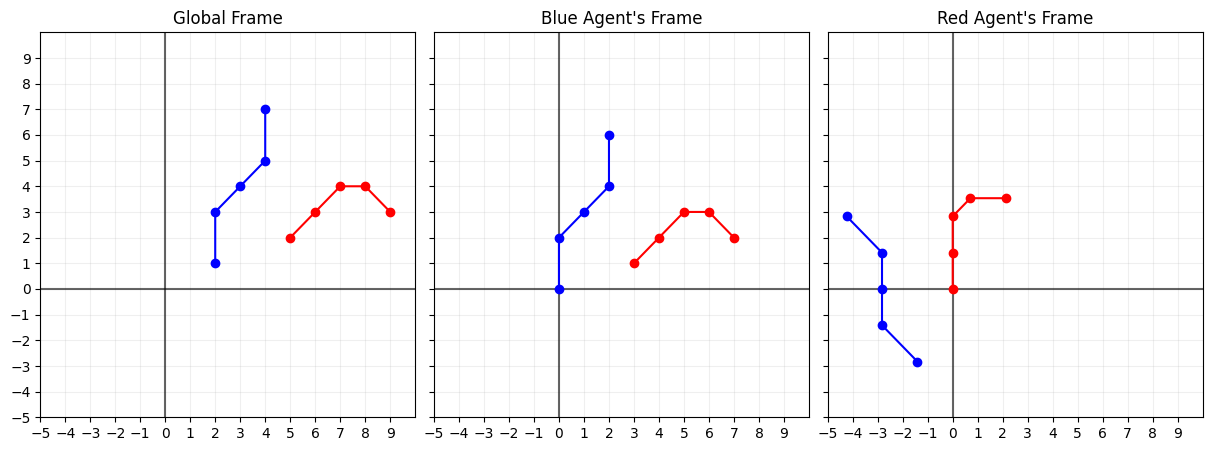

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, sharex=True, figsize=(15, 5))

for a in ax.reshape(-1):
    a.grid(alpha=0.2)
    a.set_xlim(-5, 10)
    a.set_ylim(-5, 10)
    a.set_xticks(np.arange(-5, 10, 1))
    a.set_yticks(np.arange(-5, 10, 1))
    # a.spines['bottom'].set_position('zero')
    a.axhline(0, color='black', alpha=0.6)
    a.axvline(0, color='black', alpha=0.6)

ax[0].plot(trajectory_1[:, 0], trajectory_1[:, 1], color='blue', marker='o')
ax[0].plot(trajectory_2[:, 0], trajectory_2[:, 1], color='red', marker='o')
ax[0].set_title('Global Frame')

ax[1].plot(trajectory_11[:, 0], trajectory_11[:, 1], color='blue', marker='o')
ax[1].plot(trajectory_21[:, 0], trajectory_21[:, 1], color='red', marker='o')
ax[1].set_title("Blue Agent's Frame")

ax[2].plot(trajectory_12[:, 0], trajectory_12[:, 1], color='blue', marker='o')
ax[2].plot(trajectory_22[:, 0], trajectory_22[:, 1], color='red', marker='o')
ax[2].set_title("Red Agent's Frame")

plt.subplots_adjust(wspace=0.05, hspace=0)

# Viepoint Invariance using Pair-Pose

In [17]:
def pairpose(trajectory, heading):
    cj, hj = trajectory[-1], heading[-1]
    ci, hi = trajectory[:-1], heading[:-1]
    vij = ci - cj
    dij = np.linalg.norm(vij, axis=1)
    sa = np.cross(hi, hj)
    ca = np.dot(hi, hj)
    sb = np.cross(vij, hj) / (dij * np.linalg.norm(hj))
    cb = np.dot(vij, hj) / (dij * np.linalg.norm(hj))
    return dij, sa, ca, sb, cb

In [18]:
print(f"Blue agent pair-pose in global frame")
pairpose(trajectory_1, headings_1)

Blue agent pair-pose in global frame


(array([6.32456, 4.47214, 3.16228, 2.     ]),
 array([0.     , 0.70711, 0.70711, 0.     ]),
 array([1.     , 0.70711, 0.70711, 1.     ]),
 array([-0.31623, -0.44721, -0.31623,  0.     ]),
 array([-0.94868, -0.89443, -0.94868, -1.     ]))

In [30]:
trajectory_1_flipped = np.flip(trajectory_1, axis=0)
headings_1_flipped = -np.flip(headings_1, axis=0)
pairpose(trajectory_1_flipped, headings_1_flipped)

(array([6.32456, 4.47214, 3.16228, 2.     ]),
 array([0.     , 0.     , 0.70711, 0.70711]),
 array([1.     , 1.     , 0.70711, 0.70711]),
 array([-0.31623, -0.44721, -0.31623,  0.     ]),
 array([-0.94868, -0.89443, -0.94868, -1.     ]))

In [19]:
print(f"Blue agent pair-pose in blue agent's frame")
pairpose(trajectory_11, heading_11)

Blue agent pair-pose in blue agent's frame


(array([6.32456, 4.47214, 3.16228, 2.     ]),
 array([0.     , 0.70711, 0.70711, 0.     ]),
 array([1.     , 0.70711, 0.70711, 1.     ]),
 array([-0.31623, -0.44721, -0.31623,  0.     ]),
 array([-0.94868, -0.89443, -0.94868, -1.     ]))

In [20]:
print(f"Blue agent pair-pose in red agent's frame")
pairpose(trajectory_12, heading_12)

Blue agent pair-pose in red agent's frame


(array([6.32456, 4.47214, 3.16228, 2.     ]),
 array([0.     , 0.70711, 0.70711, 0.     ]),
 array([1.     , 0.70711, 0.70711, 1.     ]),
 array([-0.31623, -0.44721, -0.31623,  0.     ]),
 array([-0.94868, -0.89443, -0.94868, -1.     ]))

In [21]:
print(f"Red agent pair-pose in global frame")
pairpose(trajectory_2, headings_2)

Red agent pair-pose in global frame


(array([4.12311, 3.     , 2.23607, 1.41421]),
 array([-1.     , -1.     , -0.70711,  0.     ]),
 array([0.     , 0.     , 0.70711, 1.     ]),
 array([ 0.85749,  0.70711,  0.31623, -0.     ]),
 array([-0.5145 , -0.70711, -0.94868, -1.     ]))

In [22]:
print(f"Red agent pair-pose in blue agent's frame")
pairpose(trajectory_21, heading_21)

Red agent pair-pose in blue agent's frame


(array([4.12311, 3.     , 2.23607, 1.41421]),
 array([-1.     , -1.     , -0.70711,  0.     ]),
 array([0.     , 0.     , 0.70711, 1.     ]),
 array([ 0.85749,  0.70711,  0.31623, -0.     ]),
 array([-0.5145 , -0.70711, -0.94868, -1.     ]))

In [23]:
print(f"Red agent pair-pose in red agent's frame")
pairpose(trajectory_22, heading_22)

Red agent pair-pose in red agent's frame


(array([4.12311, 3.     , 2.23607, 1.41421]),
 array([-1.     , -1.     , -0.70711,  0.     ]),
 array([0.     , 0.     , 0.70711, 1.     ]),
 array([ 0.85749,  0.70711,  0.31623, -0.     ]),
 array([-0.5145 , -0.70711, -0.94868, -1.     ]))

# Sinusoidal Encoding

In [ ]:
print(f"Blue agent pair-pose in global frame")
dij, sa, ca, sb, cb = pairpose(trajectory_1, headings_1)
dij, sa, ca, sb, cb

Blue agent pair-pose in global frame


(array([6.32456, 4.47214, 3.16228, 2.     ]),
 array([0.     , 0.70711, 0.70711, 0.     ]),
 array([1.     , 0.70711, 0.70711, 1.     ]),
 array([-0.31623, -0.44721, -0.31623,  0.     ]),
 array([-0.94868, -0.89443, -0.94868, -1.     ]))

In [ ]:
frequencies = [1, 5, 10, 15, 20]
for n in frequencies:
    pn = np.sin(dij * np.exp(4 * n / len(frequencies)))

    rn = np.cos(dij * np.exp(4 * n / len(frequencies)))
    print(pn, rn)

[ 0.9981  -0.50393  0.68499 -0.96605] [ 0.06157 -0.86374  0.72855 -0.25834]
[-0.26304 -0.76682  0.13269  0.68852] [ 0.96478  0.64186 -0.99116 -0.72522]
[-0.51086 -0.9951   0.96428 -0.73582] [-0.85967 -0.09887 -0.26489  0.67717]
[ 0.54446 -0.99597  0.95885  0.25397] [-0.83879  0.08969  0.28391 -0.96721]
[-0.89549 -0.70783  0.52675 -0.88111] [ 0.44507 -0.70638 -0.85002  0.47292]


In [ ]:
ci = np.array([0,0])
hi = to_unit_vector(np.array([90]))

cj = np.array([3,3])
hj = to_unit_vector(np.array([45]))

hi, hj

(array([[0., 1.]]), array([[0.70711, 0.70711]]))

In [ ]:
vij = ci - cj
saij = np.cross(hi, hj)
caij = np.dot(hi, hj.T)
sbij = np.cross(vij, hj) / np.linalg.norm(vij)
# cbij = np.dot(vij, hj) / np.linalg.norm(vij)
vij, saij, caij, sbij, cbij

(array([-3, -3]),
 array([-0.70711]),
 array([[0.70711]]),
 array([-0.70711]),
 array([-0.70711]))

In [ ]:
vji = cj - ci
saji = -np.cross(hj, hi)
caji = np.dot(hj, hi.T)

sbji = -np.cross(vji, hi) / (np.linalg.norm(vji) * np.linalg.norm(hi))
cbji =  np.dot(vji, hi.T) / (np.linalg.norm(vji) * np.linalg.norm(hi))
vji, saji, caji, sbji, cbji

(array([3, 3]),
 array([-0.70711]),
 array([[0.70711]]),
 array([-0.70711]),
 array([0.70711]))